In [1]:
import numpy as np
import pandas as pd
import scipy.stats as sp
import seaborn as sns
    
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
 
from sklearn.linear_model import LinearRegression as lm
import statsmodels.api as sm

In [2]:
 # create a differenced series- get only random fluctuations
# this is like substracting the next value with previous
def difference(dataset, interval=1): # interval =1:default argument,remains 1 till change the value
    diff = list()
    for i in range(interval, len(dataset)):
        value = dataset[i] - dataset[i - interval]
        diff.append(value)
    return (diff)

In [3]:
# Create large images!
register_matplotlib_converters()
sns.set_style("darkgrid")
plt.rc("figure", figsize=(14, 8)) # was 16,12
plt.rc("font", size=13)

# Monthly Sunspot Dataset

In [4]:
import pip
#pip.main(["install", "openpyxl"])

In [5]:
import glob
import pandas as pd

# get data file names
path =r'D:\Ishangi_comeback\Aegis\Aegis_Advanced_Stats\Final_Assignment\Raw_data'
filenames = glob.glob(path + "/*.xlsx")

dfs = []

for df in dfs: 
    xl_file = pd.ExcelFile(filenames)

In [6]:
SS = pd.read_excel("Monthly Sunspot Dataset.xlsx") # data is taken every day
SS.head(20)


,Month,Sunspots
0,1749-01,58.0
1,1749-02,62.6
2,1749-03,70.0
3,1749-04,55.7
4,1749-05,85.0
5,1749-06,83.5
6,1749-07,94.8
7,1749-08,66.3
8,1749-09,75.9
9,1749-10,75.5


In [7]:
SS.isnull().sum() # check for null values

Month       0
Sunspots    0
dtype: int64

In [8]:
SS.shape

(2820, 2)

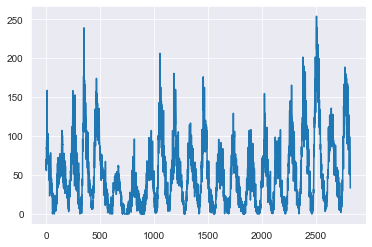

In [9]:
plt.plot(SS['Sunspots'])

In [10]:
#dataset is huge, so considering just the last 300 datapoints
#resetting index
SS_=SS[2500:]
SS_1=SS_.reset_index (drop=True) 


In [11]:
df_SS=SS_1['Sunspots']
df_SS

0      164.6
1      200.7
2      187.2
3      158.0
4      235.8
       ...  
315     71.8
316     50.3
317     55.8
318     33.3
319     33.4
Name: Sunspots, Length: 320, dtype: float64

In [12]:

df_SS.shape

(320,)

In [13]:
sm.tsa.stattools.adfuller(df_SS)

#IN ADF test, H0: Data is NOT STATIONARY
#             H1: Data is STATIONARY

#In result, 2nd value is p-value which is >0.05 hence, Null hypothesis can not be rejected(H0: Data is NOT STATIONARY).

(-3.173877988306848,
 0.021547394935645028,
 17,
 302,
 {'1%': -3.4521902441030963,
  '5%': -2.871158406898617,
  '10%': -2.5718948388228586},
 2576.3789503228118)

In [14]:
# De-trend once
df_SS_diff1 = difference(df_SS,1)

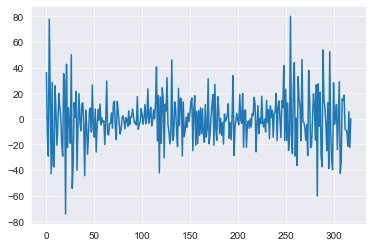

In [15]:
plt.plot(df_SS_diff1)

In [16]:
# De-seasonalize once
# seasonality =12 is clear from STL decomposition graph
df_SS_diff1_diff12 = difference(df_SS_diff1, 12) 

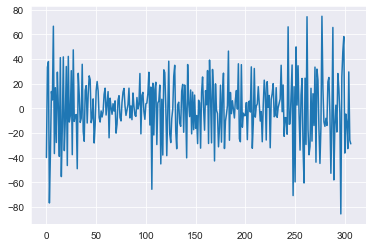

In [17]:
plt.plot(df_SS_diff1_diff12)

In [18]:
# Running thorugh ADF again to check if data is stationary, because now visually the mean betweeen 2 time windows seems to be stationary
# there is no seen seasonality in the data
# Run ADF tests on the de-trended data

sm.tsa.stattools.adfuller(df_SS_diff1_diff12)

# We observe that the p-value is < 0.05, thereby rejecting the NULL hypothesis of NON STATIONARITY
# Therefore the series is now STATIONARY

(-6.5843500424944414,
 7.3785486337470875e-09,
 13,
 293,
 {'1%': -3.452867117291862,
  '5%': -2.8714554160827745,
  '10%': -2.5720532321867466},
 2570.2915897752664)

In [19]:
# Creating STL decomposition
from statsmodels.tsa.seasonal import STL

In [20]:
stl = STL(df_SS, period=12) # period 12 since its monthly data


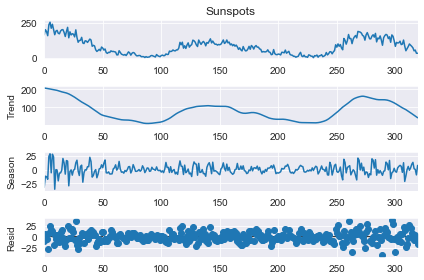

In [21]:
res = stl.fit()
fig = res.plot()

Split data into train and test (70-30)

In [22]:
#from sklearn.model_selection import train_test_split
# this will not work, because, it will take the data randomly and break the sequence

ratio = len(df_SS)*7//10 # taking 70-30 split for train and test
train_SS = df_SS.iloc[:ratio,]
test_SS=df_SS.iloc[ratio:,]



In [23]:
train_SS.shape

(224,)

In [24]:
train_SS

0      164.6
1      200.7
2      187.2
3      158.0
4      235.8
       ...  
219     39.7
220     13.9
221      9.1
222     19.4
223      7.8
Name: Sunspots, Length: 224, dtype: float64

In [25]:
test_SS

224     8.1
225     4.3
226    21.9
227    18.8
228    12.4
       ... 
315    71.8
316    50.3
317    55.8
318    33.3
319    33.4
Name: Sunspots, Length: 96, dtype: float64

In [26]:
test_SS.shape

(96,)

# M1- ARIMA

In [27]:
import statsmodels.api as sm
from statsmodels.tsa.stattools import acf
from statsmodels.tsa.stattools import pacf

C:\Users\Ishangi Jain\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


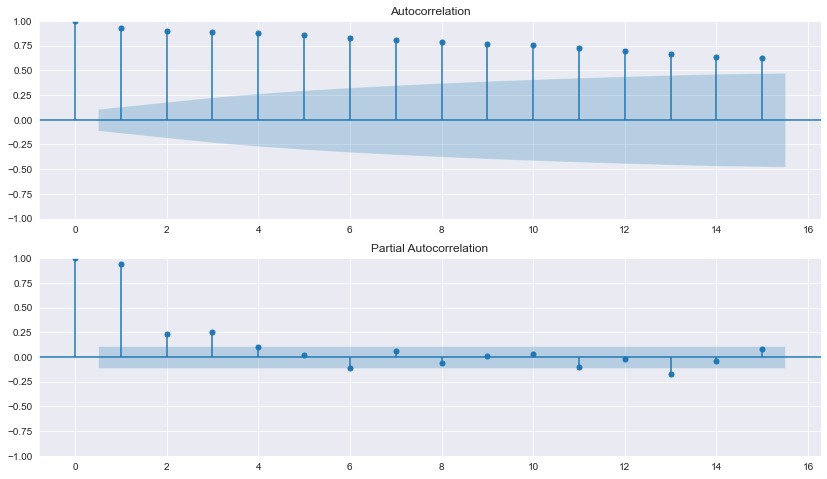

In [28]:
fig = plt.figure(figsize=(14, 8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df_SS, lags=15, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df_SS, lags=15, ax=ax2)

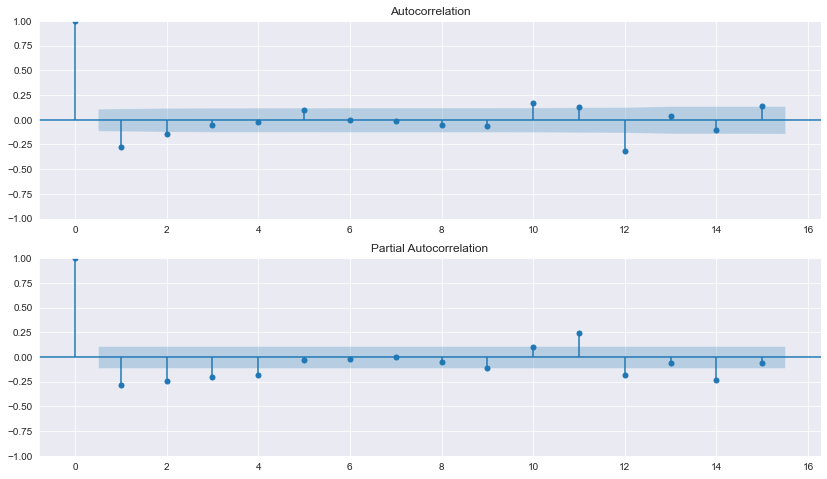

In [29]:
fig = plt.figure(figsize=(14, 8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df_SS_diff1_diff12, lags=15, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df_SS_diff1_diff12, lags=15, ax=ax2)

In [30]:
#Compute information criteria for many ARMA models.
#Each ic is an attribute with a DataFrame for the results. The AR order used is the row index. 
#The MA order used is the column index. The minimum orders are available as ic_min_order
sm.tsa.stattools.arma_order_select_ic(df_SS_diff1_diff12)

{'bic':              0            1            2
 0  2869.425467  2823.279539  2815.981330
 1  2850.205057  2817.088746  2821.655939
 2  2837.179416  2821.250816  2826.128889
 3  2830.531148  2826.211901  2831.669931
 4  2825.750722  2830.846586  2836.205050,
 'bic_min_order': (0, 2)}

In [31]:
# As per the ACF, PACF plot, p=0,q=2. PACF has 4 points which are out of the insignificant region , thus, not considered..
# the lesser the number of terms in AR and MA, the better is the model
# Also, as per above function, bic_min_order': (0, 2) which ,says p=0, q=2
# The AIC and BIC for p=0,q=2 is minimum as compared to other values and p-value is significant
# Conclusion: It is a model explained by Moving Average
M1 = sm.tsa.arima.ARIMA(train_SS,order=(0,1,2),seasonal_order=(0,1,0,12))
M1_res = M1.fit()
M1_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                          Sunspots   No. Observations:                  224
Model:             ARIMA(0, 1, 2)x(0, 1, [], 12)   Log Likelihood                -934.877
Date:                           Mon, 29 Aug 2022   AIC                           1875.754
Time:                                   22:31:26   BIC                           1885.809
Sample:                                        0   HQIC                          1879.818
                                           - 224                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.4718      0.062     -7.631      0.000      -0.593      -0.351
ma.L2         -0.1596      0.057     -2.788      0.005      -0.272      -0.047
sigma2       412.1808     39.480     10.440      0.000     334.801     489.561
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 1.34
Prob(Q):                              0.95   Prob(JB):                         0.51
Heteroskedasticity (H):               0.68   Skew:                            -0.18
Prob(H) (two-sided):                  0.11   Kurtosis:                         3.15
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

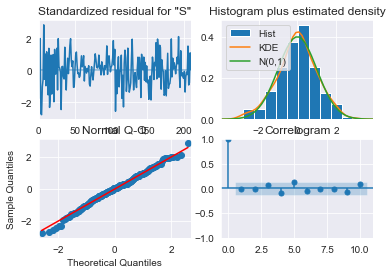

In [32]:
pred = M1_res.plot_diagnostics()

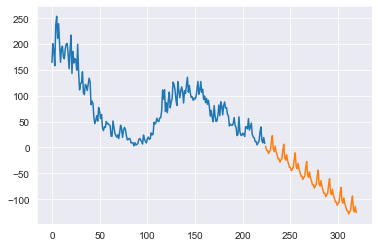

In [33]:
tforecast =  M1_res.forecast(96)# 96 is the test size, so forecasting for the same 
plt.plot(train_SS)
plt.plot(tforecast)

In [34]:
tforecast

224      2.330467
225     -5.191616
226     -5.191616
227    -11.591616
228     -7.691616
          ...    
315    -93.832927
316   -119.632927
317   -124.432927
318   -114.132927
319   -125.732927
Name: predicted_mean, Length: 96, dtype: float64

In [35]:
tpredict =  M1_res.predict(1)
tpredict

1      164.586553
2      200.688688
3      187.199829
4      158.005657
5      235.789212
          ...    
219      9.073560
220     32.747811
221     24.804245
222     -2.582139
223      7.035141
Name: predicted_mean, Length: 223, dtype: float64

In [36]:
train_SS

0      164.6
1      200.7
2      187.2
3      158.0
4      235.8
       ...  
219     39.7
220     13.9
221      9.1
222     19.4
223      7.8
Name: Sunspots, Length: 224, dtype: float64

In [37]:
#manually calculating the RMSE for train dataset
((train_SS[1:]-tpredict)**2).mean()

506.62695524234823

In [38]:
import math
math.sqrt(506.62695524234823)

22.50837522439921

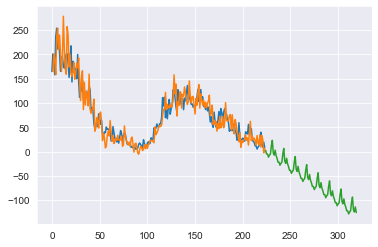

In [39]:
plt.plot(train_SS) # blue
plt.plot(tpredict)#orange
plt.plot(tforecast) #green

In [40]:
tforecast2 = M1_res.get_forecast(96)
confint = np.array(tforecast2.conf_int())

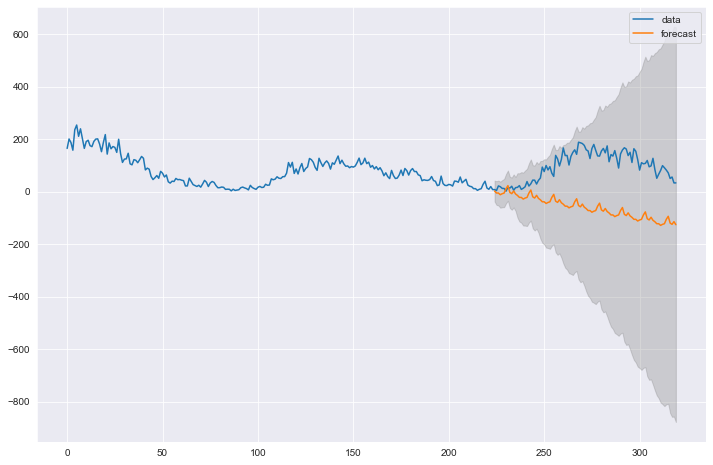

In [41]:
fig,ax = plt.subplots(figsize=(12,8))
ax.plot(df_SS.index, df_SS, label='data')
ax.plot(tforecast2.predicted_mean.index, tforecast2.predicted_mean, label='forecast')
ax.fill_between(tforecast2.predicted_mean.index, confint[:,0], confint[:,1],color='gray',alpha=0.3)
ax.legend()

In [42]:
#RMSE for test data for M1(ARIMA)
from sklearn.metrics import mean_squared_error
RMSE=mean_squared_error(test_SS,tforecast,squared=False)
RMSE

175.74790806062487

In [43]:
# Calculating R-Squared to evaluate the model
#The ideal value for R-squared is 1 for best fit model
#Value of R-square can also be negative when the model fitted is worse than the average fitted model. 

from sklearn.metrics import r2_score

r2 = r2_score(test_SS, tforecast)
r2

-8.902807250971446

# M2- AutoARIMA

In [44]:
 #!pip install pmdarima

In [45]:
import pmdarima as pm

In [46]:
M2 = pm.auto_arima(train_SS,start_p=0, start_q=0,
                             max_p=5, max_q=5, m=12,
                             start_P=0, seasonal=True,
                             d=1, D=1, trace=True,
                             error_action='ignore',  # don't want to know if an order does not work
                             suppress_warnings=True,  # don't want convergence warnings
                             stepwise=True)  # set to stepwise

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=1861.223, Time=0.12 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=1919.250, Time=0.02 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=1877.942, Time=0.12 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=1824.942, Time=0.20 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=1877.878, Time=0.06 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=inf, Time=0.55 sec
 ARIMA(0,1,1)(0,1,2)[12]             : AIC=inf, Time=0.68 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=1856.224, Time=0.11 sec
 ARIMA(0,1,1)(1,1,2)[12]             : AIC=inf, Time=1.11 sec
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=1825.635, Time=0.34 sec
 ARIMA(0,1,2)(0,1,1)[12]             : AIC=1824.873, Time=0.30 sec
 ARIMA(0,1,2)(0,1,0)[12]             : AIC=1875.754, Time=0.07 sec
 ARIMA(0,1,2)(1,1,1)[12]             : AIC=inf, Time=0.37 sec
 ARIMA(0,1,2)(0,1,2)[12]             : AIC=inf, Time=0.86 sec
 ARIMA(0,1,2)(1,1,0)[12]             : AIC=1

In [47]:
M2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  224
Model:             SARIMAX(1, 1, 2)x(0, 1, [1], 12)   Log Likelihood                -902.976
Date:                              Mon, 29 Aug 2022   AIC                           1815.952
Time:                                      22:31:45   BIC                           1832.712
Sample:                                           0   HQIC                          1822.727
                                              - 224                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7029      0.090     -7.843      0.000      -0.879      -0.527
ma.L1          0.3318      0.102      3.246      0.001       0.131       0.532
ma.L2         -0.5034      0.057     -8.851      0.000      -0.615      -0.392
ma.S.L12      -0.8161      0.060    -13.651      0.000      -0.933      -0.699
sigma2       285.4788     25.130     11.360      0.000     236.225     334.733
===================================================================================
Ljung-Box (L1) (Q):                   0.12   Jarque-Bera (JB):                 8.23
Prob(Q):                              0.73   Prob(JB):                         0.02
Heteroskedasticity (H):               0.44   Skew:                            -0.18
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.90
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

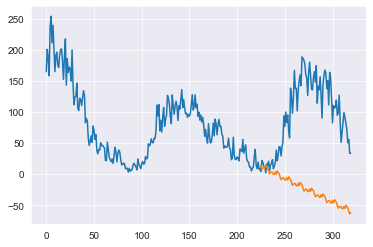

In [48]:
M2.fit(train_SS)
fc = M2.predict(96)
plt.plot(df_SS)
plt.plot(np.arange(224,224+96,1),fc)


In [49]:
fc

224    11.328090
225    13.085903
226     8.110779
227     9.281888
228    12.421927
         ...    
315   -52.520761
316   -54.306088
317   -59.475343
318   -64.040624
319   -62.284600
Length: 96, dtype: float64

In [50]:
#RMSE for test data for M2 (Auto-ARIMA)
from sklearn.metrics import mean_squared_error
RMSE=mean_squared_error(test_SS,fc,squared=False)
RMSE

137.36654795161832

In [51]:
from sklearn.metrics import r2_score

r2 = r2_score(test_SS, fc)
r2

-5.049785356656489

# M3- Holts Winter's Model

# Simple Exponential Smoothing: Level 

In [52]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

In [53]:
ses = SimpleExpSmoothing(train_SS)

In [54]:
type(ses)

statsmodels.tsa.holtwinters.model.SimpleExpSmoothing

In [55]:
result1 = ses.fit(smoothing_level=0.5, optimized=False)

In [56]:
result1.summary()

Dep. Variable:,Sunspots,No. Observations:,224
Model:,SimpleExpSmoothing,SSE,63200.102
Optimized:,False,AIC,1267.901
Trend:,None,BIC,1274.724
Seasonal:,None,AICC,1268.084
Seasonal Periods:,None,Date:,"Mon, 29 Aug 2022"
Box-Cox:,False,Time:,22:31:46
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.5000000,alpha,False
initial_level,164.60000,l.0,False


In [57]:
pred1 = result1.predict(start=1, end=320)

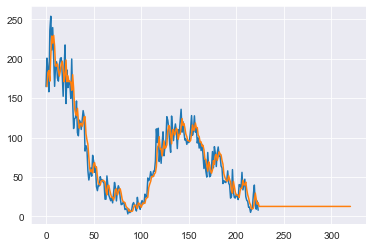

In [58]:
plt.plot(train_SS)
plt.plot(pred1)

In [59]:
result1.params

{'smoothing_level': 0.5,
 'smoothing_trend': None,
 'smoothing_seasonal': None,
 'damping_trend': nan,
 'initial_level': 164.6,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

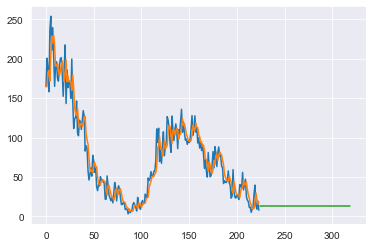

In [60]:
plt.plot(train_SS)
plt.plot(result1.fittedvalues)
plt.plot(result1.forecast(96))

In [61]:
result2 = ses.fit(smoothing_level=0.7, optimized=False) # optimize the values of alpha from 0.5 to 0.7

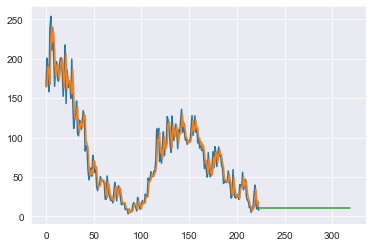

In [62]:
plt.plot(train_SS)
plt.plot(result2.fittedvalues)
plt.plot(result2.forecast(96))
# the model is better fitted when we increase the alpha from 0.5 to 0.7 i.e. the model is better explained by the recent observed value of alpha as compared to previous values

In [63]:
result2.params

{'smoothing_level': 0.7,
 'smoothing_trend': None,
 'smoothing_seasonal': None,
 'damping_trend': nan,
 'initial_level': 164.6,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

# Holt's linear trend values: Level+Trend

In [64]:
from statsmodels.tsa.holtwinters import Holt

In [65]:
model = Holt(train_SS)
result3 = model.fit()
result3.params

{'smoothing_level': 0.49444816788731294,
 'smoothing_trend': 1.0805567849085942e-15,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 182.152746078766,
 'initial_trend': -0.7601300764769237,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [66]:
result3.summary()

Dep. Variable:,Sunspots,No. Observations:,224
Model:,Holt,SSE,62355.006
Optimized:,True,AIC,1268.886
Trend:,Additive,BIC,1282.532
Seasonal:,None,AICC,1269.273
Seasonal Periods:,None,Date:,"Mon, 29 Aug 2022"
Box-Cox:,False,Time:,22:31:46
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.4944482,alpha,True
smoothing_trend,1.0806e-15,beta,True


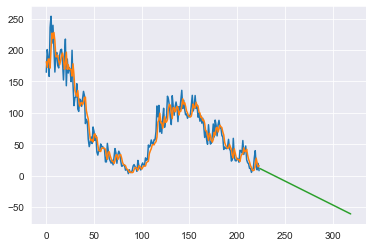

In [67]:
plt.plot(train_SS)
plt.plot(result3.fittedvalues)
plt.plot(result3.forecast(96))

# Final Holtz Winter Model: Level+Trend+Seasonality

In [68]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [69]:
model = ExponentialSmoothing(train_SS, trend='add', seasonal='add', seasonal_periods=12)
# seasonal = add as this is a additive model and not multiplicative as the amplitude is not changing

In [70]:
result4 = model.fit()
result4.params

{'smoothing_level': 0.5104306639511148,
 'smoothing_trend': 6.726456661948676e-05,
 'smoothing_seasonal': 5.6903100196213834e-05,
 'damping_trend': nan,
 'initial_level': 180.4419070527454,
 'initial_trend': -0.7626131490010742,
 'initial_seasons': array([-0.07914164, -1.69655154, -0.89137172,  1.051327  ,  3.39493784,
        -3.4232485 , -9.08054244, -1.35196139,  1.25344121, -5.89835287,
        -4.21072836, -4.71494039]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [71]:
result4.summary()

Dep. Variable:,Sunspots,No. Observations:,224
Model:,ExponentialSmoothing,SSE,58860.562
Optimized:,True,AIC,1279.967
Trend:,Additive,BIC,1334.553
Seasonal:,Additive,AICC,1283.303
Seasonal Periods:,12,Date:,"Mon, 29 Aug 2022"
Box-Cox:,False,Time:,22:31:47
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.5104307,alpha,True
smoothing_trend,6.7265e-05,beta,True


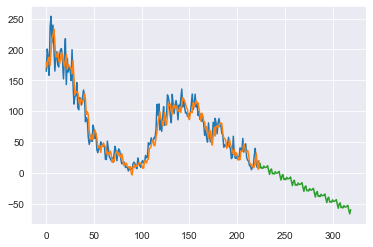

In [72]:
plt.plot(train_SS)
plt.plot(result4.fittedvalues)
plt.plot(result4.forecast(96))

In [73]:
result4.forecast(96)

224    15.429791
225     7.515754
226     8.441157
227     7.174694
228    11.048305
         ...    
315   -54.136077
316   -52.554686
317   -60.135099
318   -66.554607
319   -59.587603
Length: 96, dtype: float64

In [74]:
from sklearn.metrics import mean_squared_error
RMSE=mean_squared_error(test_SS,result4.forecast(96),squared=False)
RMSE

138.09040185330232

In [75]:
from sklearn.metrics import r2_score

r2 = r2_score(test_SS, result4.forecast(96))
r2

-5.1137121104108605

# Conclusion: Holtz Winter's model is the preferred model for this data as it is showing better R-squared value and better accuracy.

The trend in the model is downwards and hence the accuracy is low as the recent trend was downwards only on which the model was trained. The forecast is also done for a very long time whcih is not advisible, as we subject the model to the upwards trend,it will get trained for the upward trend also the accuracy will increase.